**Table of contents**<a id='toc0_'></a>    
- 1. [Importing Data](#toc1_)    
- 2. [Creating Data Visualizations](#toc2_)    
  - 2.1. [Creating Sample Subset for Line Charts](#toc2_1_)    
  - 2.2. [Understanding the Data](#toc2_2_)    
  - 2.3. [Number of Orders per Day](#toc2_3_)    
  - 2.4. [Development of Prices across the Days of the Week'](#toc2_4_)    
  - 2.5. [Sales by Hour of Day](#toc2_5_)    
  - 2.6. [Distribution of Orders based on Customer Loyalty](#toc2_6_)    
  - 2.7. [Customer expenditure by Hour of Day](#toc2_7_)    
  - 2.8. [Family Situation across Customer Age](#toc2_8_)    
  - 2.9. [Relationship between Income and Customer Age](#toc2_9_)    
- 3. [Exporting Charts as PNG files](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Importing Data](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
Path = r'D:\Data Analysis\01-08-2025 Instacart Basket Analysis'
df_merged = pd.read_pickle(os.path.join(Path, 'Data', 'Prepared Data', 'ord_pro_cust.pkl'))
df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,orders_frequency,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,3108588,1,8,1,14,14.0,10258,3,1,Pistachios,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3108588,1,8,1,14,14.0,25133,4,1,Organic String Cheese,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,3108588,1,8,1,14,14.0,46149,5,0,Zero Calorie Cola,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [3]:
df_merged.shape

(30629741, 30)

# 2. <a id='toc2_'></a>[Creating Data Visualizations](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Creating Sample Subset for Line Charts](#toc0_)

In [3]:
#Creating array of random True/False values stored in dev
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7
dev

array([False,  True, False, ..., False,  True,  True], shape=(30629741,))

In [4]:
#Creating subset sample dataframes
big = df_merged[dev]
small = df_merged[~dev]

In [5]:
# Creating a data frame with only the columns needed
df = small[['order_day_of_week', 'prices']]
df.shape

(9187984, 2)

## 2.2. <a id='toc2_2_'></a>[Understanding the Data](#toc0_)

Text(0.5, 0, 'Price')

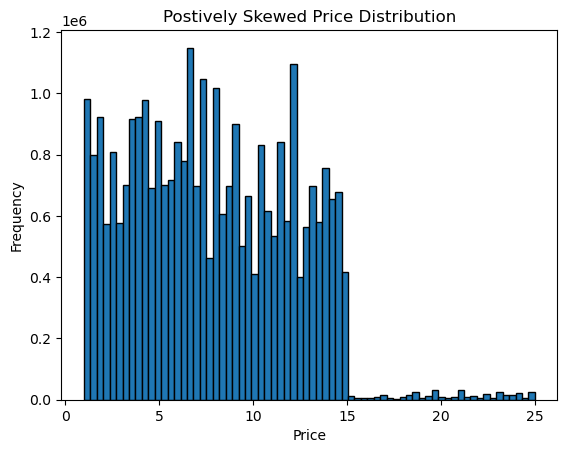

In [9]:
# Creating a histogram to review the distribution of price values
hist_1 = df_merged['prices'].plot.hist(bins=70, edgecolor='black')
plt.title('Postively Skewed Price Distribution')
plt.xlabel('Price')

Text(0.5, 1.0, 'Price Changes Correlation')

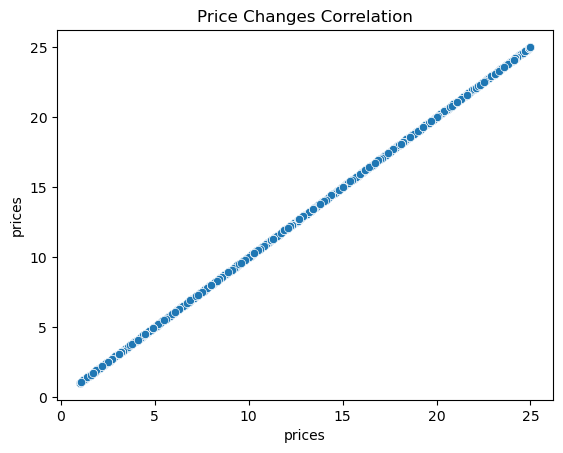

In [10]:
# Creating scatter plot of Price column
scatter_price = sns.scatterplot(data=df_merged, x='prices', y='prices')
plt.title('Price Changes Correlation')

## 2.3. <a id='toc2_3_'></a>[Number of Orders per Day](#toc0_)

In [11]:
df_merged['order_day_of_week'].value_counts(dropna=False)

order_day_of_week
0    5865100
1    5355085
6    4247179
2    3984343
5    3975292
3    3627613
4    3575129
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x25d9ac4b9d0>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thu'),
  Text(6, 0, 'Fri')])

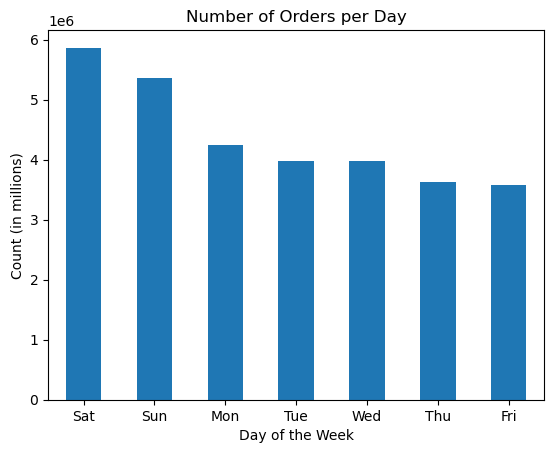

In [12]:
# Creating bar chart of the number of orders per day
bar = df_merged['order_day_of_week'].value_counts(dropna=False).plot.bar()
plt.ylabel('Count (in millions)')
plt.xlabel('Day of the Week')
plt.title('Number of Orders per Day')
plt.xticks([0,1,2,3,4,5,6], ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], rotation=0)

## 2.4. <a id='toc2_4_'></a>[Development of Prices across the Days of the Week'](#toc0_)

In [13]:
df.groupby('order_day_of_week')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
order_day_of_week,,,,,,,,
0,1759592.0,7.854438,4.263005,1.0,4.3,7.5,11.3,25.0
1,1605372.0,7.768168,4.225723,1.0,4.2,7.3,11.2,25.0
2,1194694.0,7.753297,4.229083,1.0,4.2,7.3,11.2,25.0
3,1087515.0,7.758807,4.224449,1.0,4.2,7.3,11.2,25.0
4,1072323.0,7.752677,4.229992,1.0,4.2,7.3,11.2,25.0
5,1192062.0,7.767060,4.236988,1.0,4.2,7.3,11.2,25.0
6,1274980.0,7.855205,4.268145,1.0,4.3,7.5,11.3,25.0


Text(0.5, 0, 'Day of the Week')

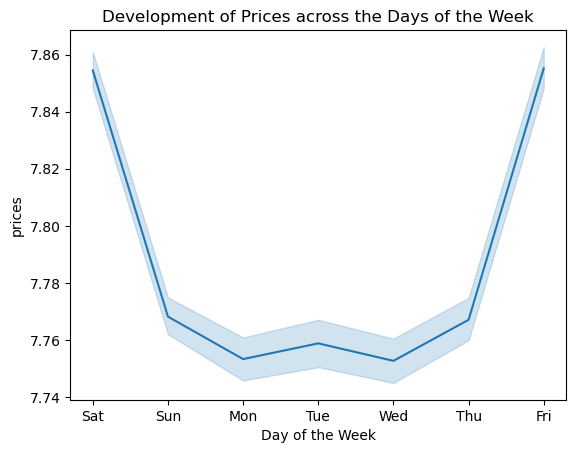

In [14]:
#Creating Line Chart
line_day = sns.lineplot(data=df, x='order_day_of_week', y='prices')
plt.title('Development of Prices across the Days of the Week')
plt.xlabel('Day of the Week')
plt.xticks([0,1,2,3,4,5,6], ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], rotation=0)
plt.xlabel('Day of the Week')

## 2.5. <a id='toc2_5_'></a>[Sales by Hour of Day](#toc0_)

In [15]:
df_merged['order_hour_of_day'].value_counts()

order_hour_of_day
10    2609878
11    2585887
14    2543388
15    2519570
13    2517264
12    2474099
16    2398341
9     2320463
17    1973941
8     1623690
18    1543892
19    1189761
20     921249
7      841413
21     752663
22     598927
23     378678
6      275016
0      206659
1      109281
5       83273
2       65188
4       49418
3       47802
Name: count, dtype: int64

<Figure size 1000x2000 with 0 Axes>

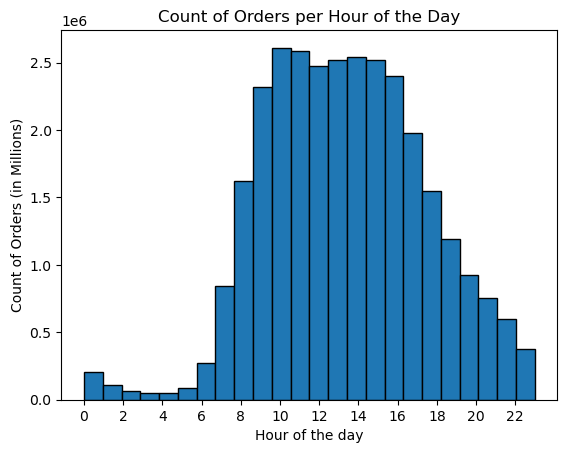

<Figure size 1000x2000 with 0 Axes>

In [16]:
# Creating Count of Orders per Hour of the Day histogram
hist_2 = df_merged['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Count of Orders per Hour of the Day')
plt.xlabel('Hour of the day')
plt.ylabel('Count of Orders (in Millions)')
plt.xticks(range(0, 24, 2))
plt.figure(figsize=(10,20))

The histogram shows customers are most actively ordering between 10 a.m. and 4 p.m., with peaks being at 11 a.m. and 12 a.m.

## 2.6. <a id='toc2_6_'></a>[Distribution of Orders based on Customer Loyalty](#toc0_)

In [17]:
df_merged['loyalty_flag'].value_counts()

loyalty_flag
Regular Customer    15020190
Loyal Customer       9707390
New Customer         5902161
Name: count, dtype: int64

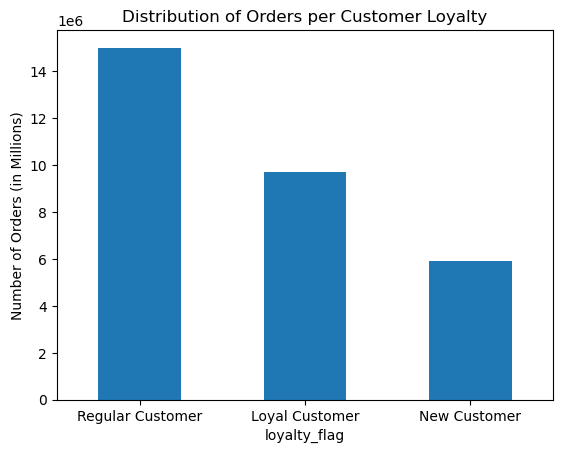

In [ ]:
#Distribution Customer Loyalty Bar Chart
bar_loyalty = df_merged['loyalty_flag'].value_counts().plot.bar(rot=0)
plt.title('Distribution of Orders per Customer Loyalty')
plt.ylabel('Number of Orders (in Millions)')
plt.ticklabel_format(axis='y', scilimits=(6,6))

## 2.7. <a id='toc2_7_'></a>[Customer expenditure by Hour of Day](#toc0_)

In [7]:
#Creating a new data frame for Customer Expenditure Line Chart
df_2 = small[['order_hour_of_day', 'prices']]
df_2.groupby('order_hour_of_day')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
order_hour_of_day,,,,,,,,
0,62091.0,7.812240,4.217897,1.0,4.3,7.4,11.2,25.0
1,32915.0,7.797448,4.235945,1.0,4.2,7.4,11.3,25.0
2,19696.0,7.811769,4.253228,1.0,4.3,7.4,11.3,25.0
3,14381.0,7.855747,4.207964,1.0,4.4,7.5,11.3,25.0
4,14853.0,7.817390,4.241922,1.0,4.2,7.4,11.3,25.0
5,24906.0,7.849217,4.223521,1.0,4.3,7.5,11.3,25.0
6,82638.0,7.820494,4.241741,1.0,4.3,7.4,11.3,25.0
7,251941.0,7.829760,4.248558,1.0,4.3,7.4,11.3,25.0
8,486134.0,7.799344,4.241343,1.0,4.2,7.4,11.3,25.0


<Figure size 1000x2000 with 0 Axes>

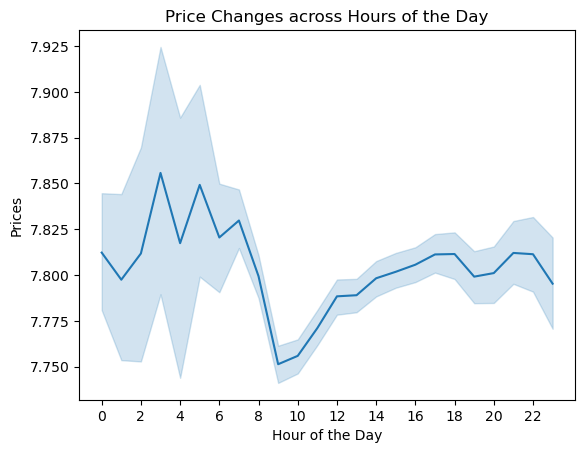

<Figure size 1000x2000 with 0 Axes>

In [8]:
# Customer Expenditure across Hours of the Day Line Chart
line_hour = sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')
plt.title('Price Changes across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')
plt.xticks(range(0,24,2))
plt.figure(figsize=(10,20))

## 2.8. <a id='toc2_8_'></a>[Family Situation across Customer Age](#toc0_)

In [11]:
# Creating a new data frame for Family Situation Line Chart
df_3 = small[['Age', 'n_dependants']]
df_3['Age'].describe()

count    9.187984e+06
mean     4.947176e+01
std      1.847460e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

<Figure size 1000x2000 with 0 Axes>

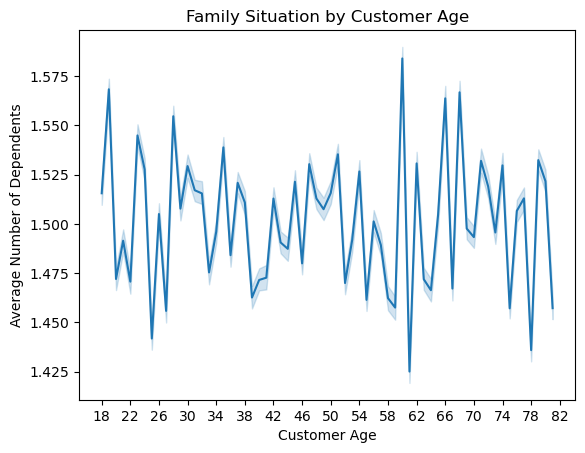

<Figure size 1000x2000 with 0 Axes>

In [12]:
# Family Situation by Customer Age Line Chart
line_age = sns.lineplot(data=df_3, x='Age', y='n_dependants')
plt.title('Family Situation by Customer Age')
plt.ylabel('Average Number of Dependents')
plt.xlabel('Customer Age')
plt.xticks(range(18,86,4))
plt.figure(figsize=(10,20))

The line chart shows there is no clear correlation between customer age and number of dependents, the relationship does not reflect a clear pattern.

## 2.9. <a id='toc2_9_'></a>[Relationship between Income and Customer Age](#toc0_)

([<matplotlib.axis.XTick at 0x25e47fae710>,
 [Text(18, 0, '18'),
  Text(22, 0, '22'),
  Text(26, 0, '26'),
  Text(30, 0, '30'),
  Text(34, 0, '34'),
  Text(38, 0, '38'),
  Text(42, 0, '42'),
  Text(46, 0, '46'),
  Text(50, 0, '50'),
  Text(54, 0, '54'),
  Text(58, 0, '58'),
  Text(62, 0, '62'),
  Text(66, 0, '66'),
  Text(70, 0, '70'),
  Text(74, 0, '74'),
  Text(78, 0, '78'),
  Text(82, 0, '82')])

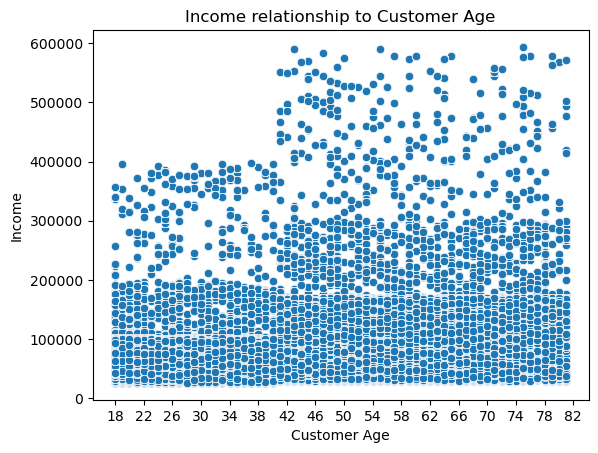

In [31]:
#Creating Scatter plot to review relationship between Customer Age and Income
scatter_AgeIncome = sns.scatterplot(data=df_merged, x='Age', y='income')
plt.title('Income relationship to Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Income')
plt.xticks(range(18,86,4))

The scatter plot demonstrates that income among customers increases at age 41. Young adults tend to have the most income concentration below $20,000 and only a few achieving income streams between $20,000 and $40,0000. Adults over the age of 40, on the other hand, have the most concentration below $19,000, with a medium concentration of adults enjoying income ranges of $20,000 and $30,000 and the lowest concentration achieving income streams between $30,000 and $59,000.

# 3. <a id='toc3_'></a>[Exporting Charts as PNG files](#toc0_)

In [32]:
bar.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'OrdersPerDayBar.png'))
hist_1.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', ' PriceHist.png'))
scatter_price.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'PriceScatter.png'))
line_day.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'PriceDOWeekLine.png'))
hist_2.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'OrdersPerHourHist.png'))
bar_loyalty.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'OrdersPerLoyaltyBar.png'))
line_hour.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'PricePerHourLine.png'))
line_age.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'AgeDependLine.png'))
scatter_AgeIncome.figure.savefig(os.path.join(Path, 'Analysis', 'Visualizations', 'AgeIncomeScatter.png'))